In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# KNN을 이용한 유방암 분류

## 데이터 전처리

##### 분석에 필요한 데이터 구성

In [2]:
data = pd.read_csv("./유방암.csv", engine='python')
data.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.shape

(569, 31)

In [4]:
table = str.maketrans(' ', '_')
rename_dict = { col:col.lower().translate(table)  for col in data.columns}

data.rename(columns=rename_dict,inplace=True)
data.columns

Index(['diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [5]:
df_y = data.diagnosis
df_x = data.drop("diagnosis",axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (398, 30)
train data Y size: (398,)
test data X size: (171, 30)
test data Y size: (171,)


In [6]:
df_train_x_scaled = scale(df_train_x,axis=0)
df_test_x_scaled = scale(df_test_x,axis=0)
pd.DataFrame(df_train_x_scaled,columns=df_train_x.columns).head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-1.537538,-0.555548,-1.519860,-1.202355,0.513983,-0.567464,-1.120375,-1.249209,0.620657,1.172660,...,-1.276643,-0.472874,-1.300672,-1.011696,0.548118,-0.768557,-1.277839,-1.733444,-0.771425,0.221296
1,-0.796097,-0.386037,-0.813568,-0.734869,-0.560715,-0.965140,-0.771266,-0.716927,-0.810121,-0.513848,...,-0.680246,1.698160,-0.676490,-0.648918,0.518137,-0.580688,-0.447953,-0.430111,0.089705,-0.363035
2,0.217527,-0.386037,0.185577,0.051241,1.411902,0.489621,0.810195,0.936694,0.516330,-0.082614,...,0.458706,-0.692868,0.400268,0.150331,0.338256,-0.254325,0.259580,0.764436,0.808944,-0.675025
3,0.895158,0.888784,0.765950,0.771536,-0.698209,-0.781438,-0.757719,-0.530122,-0.947982,-1.376316,...,0.727913,0.919350,0.601808,0.588221,-0.394120,-0.662580,-0.722902,-0.499488,-0.760008,-1.004755
4,-0.880801,-0.490530,-0.864427,-0.828931,1.601307,0.049639,-0.610699,-0.167410,0.505152,2.422242,...,-0.961878,-0.803668,-0.942938,-0.844601,1.413263,-0.334411,-0.702280,-0.307839,-0.225064,1.689948


## 모델 생성

### 기본 매개 변수를 이용한 모델 생성

In [13]:
# KNN
neighbors = []
train_accuracy = []
test_accuracy = []

KNN = KNeighborsClassifier()
KNN.fit(df_train_x_scaled,df_train_y)

KNN.score(df_test_x_scaled,df_test_y).round(3)

0.942

### 이웃 수 증가에 따른 정확도 변화

##### 이웃 수를 1~ 10 까지 증가시킴

In [8]:
# KNN
train_accuracy = []
test_accuracy = []
neighbors = []
for n in range(3,31):
    KNN = KNeighborsClassifier(n_neighbors=n, weights="uniform",algorithm="ball_tree",metric="euclidean")
    KNN.fit(df_train_x_scaled,df_train_y)
    
    neighbors.append(n)
    train_accuracy.append(KNN.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(KNN.score(df_test_x_scaled,df_test_y))


In [9]:
result = pd.DataFrame()
result["Train"] = train_accuracy
result["Test"] = test_accuracy
result['Neighbors'] = neighbors
result

,Train,Test,Neighbors
0,0.994975,0.929825,3
1,0.987437,0.941520,4
2,0.984925,0.941520,5
3,0.979899,0.947368,6
4,0.984925,0.941520,7
5,0.982412,0.935673,8
6,0.979899,0.935673,9
7,0.977387,0.929825,10
8,0.974874,0.923977,11
9,0.974874,0.929825,12


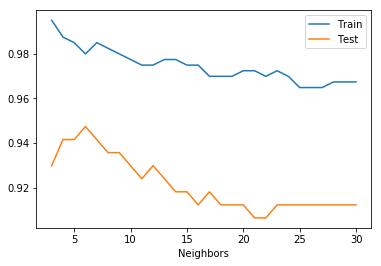

In [10]:
result.set_index("Neighbors",inplace=False).plot()

In [16]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(df_train_x_scaled,df_train_y)

print('Test Accuracy:{}'.format(KNN.score(df_test_x_scaled,df_test_y).round(3)))

Test Accuracy:0.947


##### 기본 매개 변수보다 이웃 수가 6 일때 미세하게 높은 것을 확인 할 수 있다.